<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/hw_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів



In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/data/yulu_rental.csv'
df = pd.read_csv(data_path)

**Питання 1.** Як час доби впливає на активність оренди велосипедів?

In [19]:
# Перетворення колонки datetime на тип даних pd.datetime
df['datetime'] = pd.to_datetime(df.datetime)

In [20]:
# Створення нової колонки для години
df['hour'] = df['datetime'].dt.hour

In [21]:
# Групування даних за годинами та обчислення середньої кількості оренд
hourly_data = df.groupby('hour')['count'].mean()

In [22]:
x = hourly_data.index
y = hourly_data.values

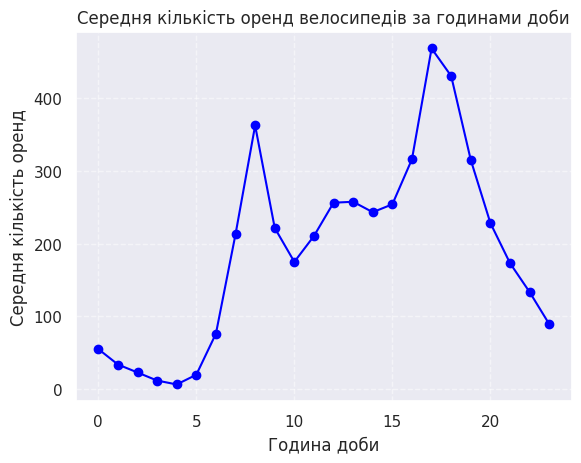

In [23]:
plt.plot(x, y, marker='o', color='blue');
plt.title('Середня кількість оренд велосипедів за годинами доби')
plt.xlabel('Година доби')
plt.ylabel('Середня кількість оренд')
plt.grid(axis='both', linestyle='--', alpha=0.5)

**Висновки:**

Найвища активність спостерігається вранці (близько 7-8 години) і ввечері (близько 17-18 години), що відповідає часу доби, коли люди їдуть на роботу та повертаються додому.

Нічні години мають найменшу активність, що є очікуваним результатом.

Для того, щоб збільшити активність в нічні години, можна використати акційні пропозиції або зменшити вартість поїздки, щоб привабити користувачів.

**Питання 2.**
Як кількість зареєстрованих і неформальних користувачів змінюється в різних сезонах?

In [24]:
# Групування даних за сезоном і підрахунок середнього значення для registered та casual
seasonal_users = df.groupby('season')[['registered', 'casual']].mean()

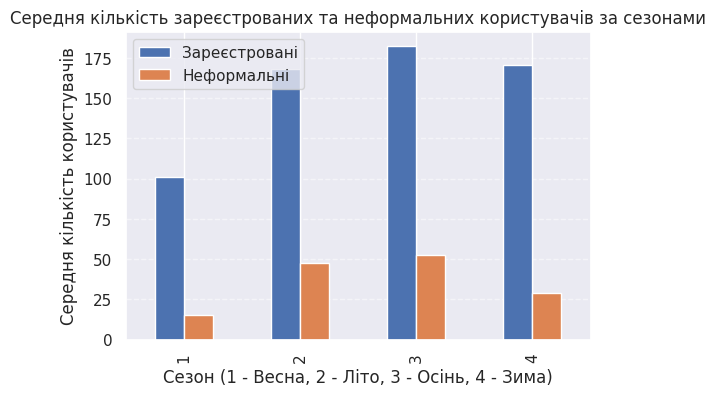

In [26]:
seasonal_users.plot.bar(figsize=(6,4))
plt.title('Середня кількість зареєстрованих та неформальних користувачів за сезонами')
plt.xlabel('Сезон (1 - Весна, 2 - Літо, 3 - Осінь, 4 - Зима)')
plt.ylabel('Середня кількість користувачів')
plt.legend(['Зареєстровані', 'Неформальні'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

**Висновки:**

Зареєстровані користувачі мають стабільно високу активність протягом усього року, що пов'язано перш за все з роботою, тому що поїздки здійснюються щоденно.

Неформальні користувачі активніші влітку та восени, ймовірно, що цей період найпривабливіший для туристів та спонтанних поїздок. Взимку кількість неформальних користувачів значно знижується, що пояснюється несприятливими погодними умовами.

Велосипеди - це відкритий вид трансорту і сприйнятливі погодні умови вкрай важливі при здійсненні поїздки. Тому для комфортної поїздки при несприятливих погодних умовах можна розглянути можливість удосконалення велосипедів великими парасольками або іншим видом захисту пасажирів від негоди.  

**Питання 3.** Як швидкість вітру та температури впливають на загальну кількість оренд велосипедів?

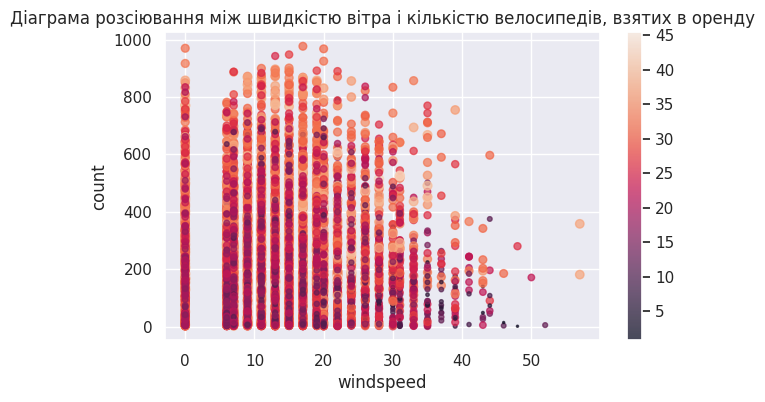

In [36]:
df['atemp'] = df.atemp

col_x = 'windspeed'
col_y = 'count'
color_feature = 'atemp'

plt.figure(figsize=(7,4))
plt.scatter(df[col_x], df[col_y], alpha=0.7,
            s=1*df[color_feature], c = df.atemp)
plt.title('Діаграма розсіювання між швидкістю вітра і кількістю велосипедів, взятих в оренду')
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar();


**Висновки:**

Точки згруповані щільно на початкових та середніх швидкостях вітру та комфортних температур, це може свідчити про найпопулярніші погодні умови для поїздок.

При більш високих або низьких температурах та високих швидкостях вітру активність користувачів зменшується. Це зрозуміло, оскільки поїздки здійснюються у відкритому транспорті і погодні умови вкрай важливі.

Рекомендація в цьому випадку співпадає з рекомендацією, яка була у другому питанні, оскільки мова йдеться про погодні умови, які впливають на якість та комфорт поїздки. Тому рекомендовано оснащення велисипедів захистом від несприйнятливих погодних умов.